In [1]:
# -- library/testing.ipynb --
# Author: Jake Cray
# GitHub: crayjake/fgw-python
''' example usage for library '''

' example usage for library '

In [2]:
'''
from google.colab import drive
drive.mount('/content/drive')


%cd /content/drive/My Drive/fgw-python/content
#! git clone 'https://github.com/crayjake/fgw-python.git'
! git pull

import sys
sys.path.insert(0,'/content/drive/My Drive/fgw-python/content/library')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n\n%cd /content/drive/My Drive/fgw-python/content\n#! git clone 'https://github.com/crayjake/fgw-python.git'\n! git pull\n\nimport sys\nsys.path.insert(0,'/content/drive/My Drive/fgw-python/content/library')\n"

In [3]:
from structures import *
from generate import generate
from schemes import CrankNicolsonDeep
from converters import converter
from animate import display

import numpy as np

In [4]:
# define the metadata -> sets up our environment
meta = Meta(
    js        = np.array(list(range(2, 3))),
    width     = 540,   # 540 km  ->  270km/150ms-1 = 1800s = 30min
    depth     = 50,        # 50 km
    h         = 100,       # scale height/depth is 100 km
    time      = 60*60*2 ,   # 4 hrs
    T         = 60*10,     # 30 mins
    sponge    = 1 * 9 / 10,   # fraction of width to use as sponge layer
    damping   = 1 * 4,    # sponge damping strength
    dt        = 10,        # timestep is 60 secs
    saveEvery = 2,          # only save every 60 States
    spacesteps= 1000
)

Starting metadata generation
Setting up the space
Generating finite difference matrices
Generating Crank-Nicolson matrices
Deep atmosphere!
Using a sponge layer
spongeStrength: 0.0026115784969105694
c_max: 158.65339368731708
spongeWidth: 243000.0
Alpha: 0.0, 1.0


In [5]:
# generate the data using the CrankNicolsonDeep step
data = generate(meta=meta, step=CrankNicolsonDeep)

100%|██████████| 719/719 [00:05<00:00, 129.27it/s]


MetaAlpha from display: 0.0026115784969105694


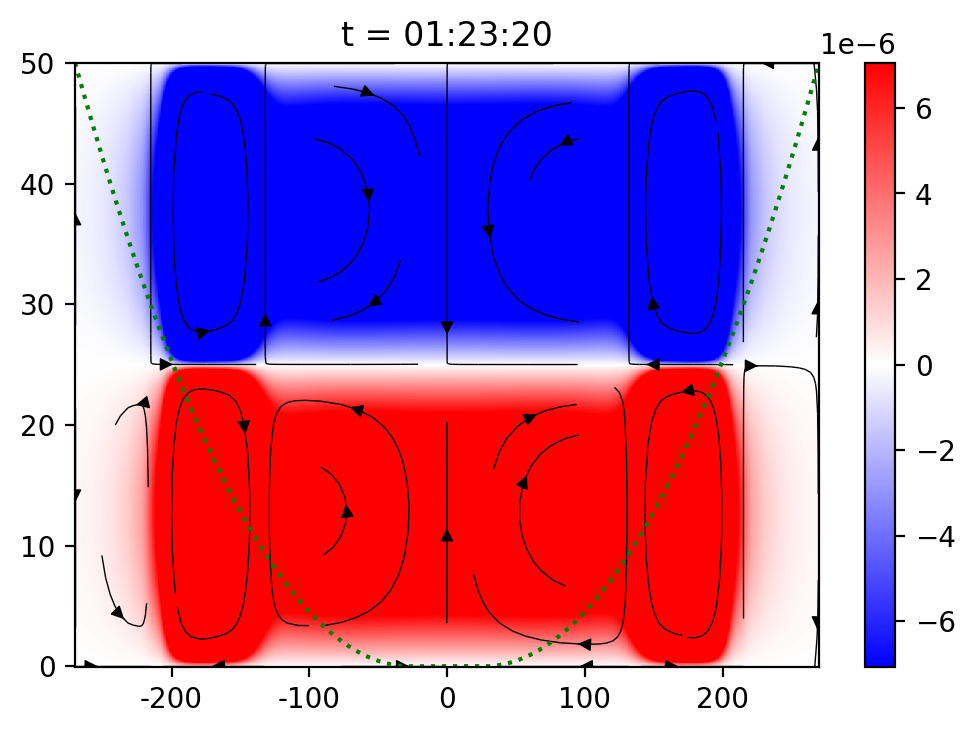

In [7]:
def singleModeConverter(data, meta):
    return converter(data, meta, 2)

display(data[250], meta, converter, sponge=False)
#display(data[63], meta, converter, sponge=False)